Cargamos e importamos los datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_excel('/Users/mariosanchez/Desktop/Proyecto_Manjar/Base de datos de Manjar.xlsx')
df.head()

,agno,mes,upc,descri_item,Vta_Uni,Vta_Pesos,Vta_Kg,EMPRESA,categoria,fabricante,marca,Gramaje,Empaque,SEGMENTO,VARIEDAD,CADENA,ZONAS
0,2018,8,78040519,SOPROLE MANJAR ACARAMELADO PT PL 200 SOPROLE,180.0,134835.0,36.00,RETAILER B,DULCE DE LECHE,SOPROLE,SOPROLE,200,POTE,MANJAR,REGULAR,CADENA B,Z10 CONCEPCION
1,2021,1,7804000001332,ECKART DULCE DE LECHE SIN LACTOSA POTE PL 380 ...,192.0,472371.0,72.96,RETAILER C,DULCE DE LECHE,ECKART ALIMENTOS SPA,ECKART,380,POTE,DULCE DE LECHE,SIN LACTOSA,CADENA C1,Z11 ZONA SUR
2,2018,6,78003095,NESTLE EL MANJAR.POT. 400 NESTLE,1455.0,1486872.0,582.00,RETAILER A,DULCE DE LECHE,NESTLE,NESTLE,400,POTE,MANJAR,REGULAR,CADENA A1,Z2 ANTOFAGASTA
3,2017,4,7802950004892,NESTLE EL MANJAR BOLSA 1000 NESTLE,5300.0,13270009.0,5300.00,RETAILER B,DULCE DE LECHE,NESTLE,NESTLE,1000,BOLSA,MANJAR,REGULAR,CADENA B,RM5 SANTIAGO SUR ORIENTE
4,2018,11,78040519,SOPROLE MANJAR ACARAMELADO PT PL 200 SOPROLE,308.0,218256.0,61.60,RETAILER B,DULCE DE LECHE,SOPROLE,SOPROLE,200,POTE,MANJAR,REGULAR,CADENA B,Z1 NORTE GRANDE


Analizamos los distintos fabricantes que hay en el mercado

In [2]:
df['fabricante'].unique()

array(['SOPROLE', 'ECKART ALIMENTOS SPA', 'NESTLE', 'PRIVADO',
       'COM. DE INSUMOS Y PROD. ALIMENTICIO', 'OT.CIAS.', 'INV.NULAN',
       'COLUN', 'WATT S', 'MICKELSEN AGROINDUSTRIAS E.I.R.L', 'IANSAGRO',
       'MASIVOS S.A.', 'A.CORDILLERA', 'AGR.CODIGUA', 'DULCINEA S.A.',
       'LAPATAIA', 'JOSE MANUEL LANGER GIORDANO', 'QUILLAYES SURLAT'],
      dtype=object)

Vemos los distintos años con lo que cuenta la base

In [3]:
df['agno'].unique()

array([2018, 2021, 2017, 2019, 2020])

Vemos con cuantos registros cuenta cada año

In [6]:
df['agno'].value_counts()

2018    35655
2017    35500
2020    34839
2019    33992
2021    30166
Name: agno, dtype: int64

Graficamos las ventas por año, omitiendo el último año que tiene menos registros que los demás 

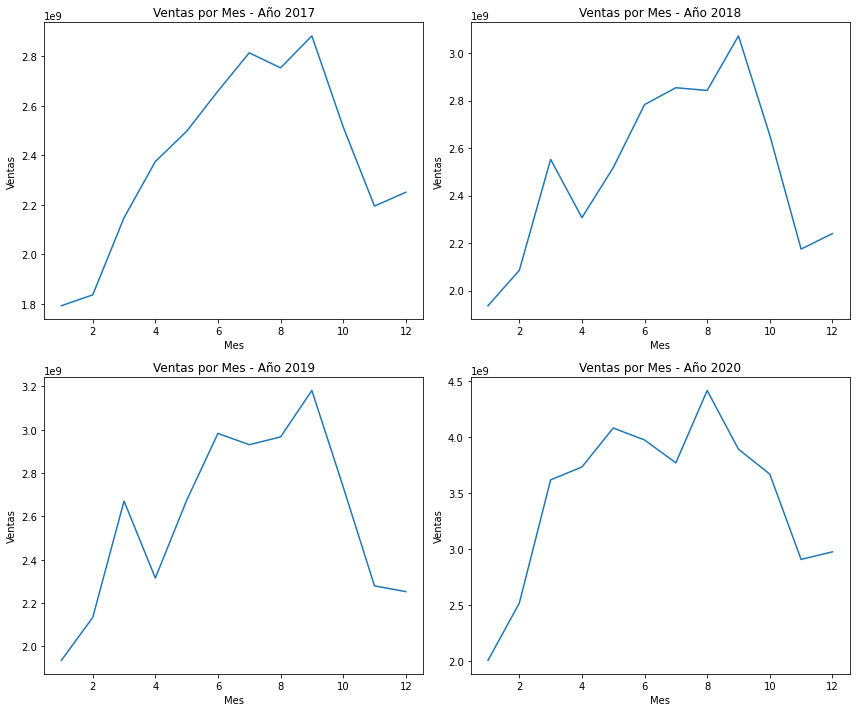

In [4]:
agno_sel1 = 2017
data_agno_sel1 = df[df['agno'] == agno_sel1]
ventas_por_mes1 = data_agno_sel1.groupby('mes')['Vta_Pesos'].sum()

agno_sel2 = 2018
data_agno_sel2 = df[df['agno'] == agno_sel2]
ventas_por_mes2 = data_agno_sel2.groupby('mes')['Vta_Pesos'].sum()

agno_sel3 = 2019
data_agno_sel3 = df[df['agno'] == agno_sel3]
ventas_por_mes3 = data_agno_sel3.groupby('mes')['Vta_Pesos'].sum()

agno_sel4 = 2020
data_agno_sel4 = df[df['agno'] == agno_sel4]
ventas_por_mes4 = data_agno_sel4.groupby('mes')['Vta_Pesos'].sum()

fig, axes = plt.subplots(2, 2, figsize=(12, 10)) 


# Gráfico para el año 2017
axes[0, 0].plot(ventas_por_mes1.index, ventas_por_mes1.values)
axes[0, 0].set_title(f'Ventas por Mes - Año {agno_sel1}')
axes[0, 0].set_xlabel('Mes')
axes[0, 0].set_ylabel('Ventas')

# Gráfico para el año 2018
axes[0, 1].plot(ventas_por_mes2.index, ventas_por_mes2.values)
axes[0, 1].set_title(f'Ventas por Mes - Año {agno_sel2}')
axes[0, 1].set_xlabel('Mes')
axes[0, 1].set_ylabel('Ventas')

# Gráfico para el año 2019
axes[1, 0].plot(ventas_por_mes3.index, ventas_por_mes3.values)
axes[1, 0].set_title(f'Ventas por Mes - Año {agno_sel3}')
axes[1, 0].set_xlabel('Mes')
axes[1, 0].set_ylabel('Ventas')

# Gráfico para el año 2020
axes[1, 1].plot(ventas_por_mes4.index, ventas_por_mes4.values)
axes[1, 1].set_title(f'Ventas por Mes - Año {agno_sel4}')
axes[1, 1].set_xlabel('Mes')
axes[1, 1].set_ylabel('Ventas')

plt.tight_layout()  # Ajusta el diseño para evitar superposiciones
plt.show()

Con esto expuesto, podemos sacar nuestra primera conclusión dandonos cuenta que la epoca donde hay mayor ventas para el producto manjar alcanza su peak entre agosto y octubre. Por otro lado donde las ventas son más bajas es al comienzo y a final del año.

Ahora veremos cuales son los principales competidores del mercado, agrupando sus ventas y ordenandolas de mayor a menor (considerando la venta de los 5 años de la base)

In [8]:
df.groupby('fabricante')['Vta_Pesos'].sum().sort_values(ascending=False)

fabricante
NESTLE                                 6.870889e+10
COLUN                                  4.862366e+10
SOPROLE                                1.397565e+10
WATT S                                 9.805561e+09
PRIVADO                                7.991425e+09
ECKART ALIMENTOS SPA                   7.449064e+09
A.CORDILLERA                           2.139116e+09
OT.CIAS.                               1.274861e+09
MASIVOS S.A.                           1.048728e+09
IANSAGRO                               8.002817e+08
COM. DE INSUMOS Y PROD. ALIMENTICIO    2.636960e+08
INV.NULAN                              9.935974e+07
MICKELSEN AGROINDUSTRIAS E.I.R.L       2.883149e+07
DULCINEA S.A.                          2.763793e+07
LAPATAIA                               9.570619e+06
AGR.CODIGUA                            2.957959e+06
JOSE MANUEL LANGER GIORDANO            5.467180e+05
QUILLAYES SURLAT                       7.790000e+02
Name: Vta_Pesos, dtype: float64

Ahora lo veremos en un gráfico de barras, limitando a los 5 primeros competidores

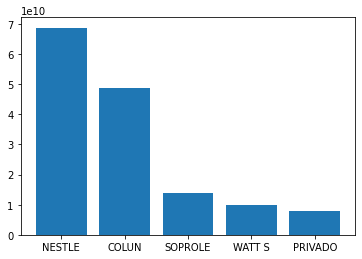

In [14]:
vta_fab = df.groupby('fabricante')['Vta_Pesos'].sum().sort_values(ascending=False).head(5)
fig, ax = plt.subplots()
ax.bar(vta_fab.index, vta_fab.values)
plt.show()

Ahora haremos lo mismo con gramaje, empaque y variedad. Para saber cuales son sus opciones y cuales son los más vendidos.

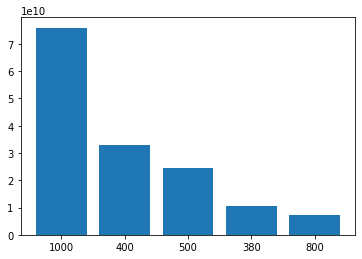

In [25]:
df['Gramaje'] = df['Gramaje'].astype(str)
vta_fab2 = df.groupby('Gramaje')['Vta_Pesos'].sum().sort_values(ascending=False).head(5)

fig, ax = plt.subplots()
ax.bar(vta_fab2.index, vta_fab2.values)
plt.show()

Ahora nos podemos dar cuenta de que el formato más vendido es el de 1000 gramos, seguido por el de 400 y 500 gramos.

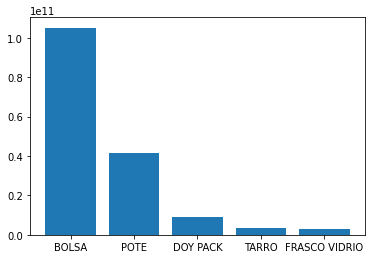

In [19]:
vta_fab3 = df.groupby('Empaque')['Vta_Pesos'].sum().sort_values(ascending=False).head(5)
fig, ax = plt.subplots()
ax.bar(vta_fab3.index, vta_fab3.values)
plt.show()

El empaque más populas son el empaque en bolsa, seguido por Pote.

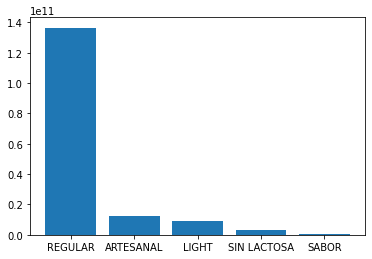

In [20]:
vta_fab4 = df.groupby('VARIEDAD')['Vta_Pesos'].sum().sort_values(ascending=False).head(5)
fig, ax = plt.subplots()
ax.bar(vta_fab4.index, vta_fab4.values)
plt.show()

Y finalmente la variedad más vendida es regular, seguida por lejos, artesanal, light y sin lactosa.